#  Data Preprocessing:

# Import all Libraries

In [1]:
import numpy as np 
import pandas as pd
import os
import cv2


import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout,UpSampling2D,Conv2DTranspose

from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate, add

In [2]:
clips_paths=[]
s=os.listdir('../input/aisegmentcom-matting-human-datasets/clip_img')
s=['../input/aisegmentcom-matting-human-datasets/clip_img/'+i for i in s]
k=[]
for i in s:
    a=os.listdir(i)
    b=[i+'/'+j for j in a]
    k.extend(b)
for i in k:
    a=os.listdir(i)
    b=[i+'/'+j for j in a]
    clips_paths.extend(b)

In [3]:
clips_paths[:10]

['../input/aisegmentcom-matting-human-datasets/clip_img/1803280126/clip_00000000/1803280126-00000226.jpg',
 '../input/aisegmentcom-matting-human-datasets/clip_img/1803280126/clip_00000000/1803280126-00000229.jpg',
 '../input/aisegmentcom-matting-human-datasets/clip_img/1803280126/clip_00000000/1803280126-00000173.jpg',
 '../input/aisegmentcom-matting-human-datasets/clip_img/1803280126/clip_00000000/1803280126-00000111.jpg',
 '../input/aisegmentcom-matting-human-datasets/clip_img/1803280126/clip_00000000/1803280126-00000421.jpg',
 '../input/aisegmentcom-matting-human-datasets/clip_img/1803280126/clip_00000000/1803280126-00000320.jpg',
 '../input/aisegmentcom-matting-human-datasets/clip_img/1803280126/clip_00000000/1803280126-00000228.jpg',
 '../input/aisegmentcom-matting-human-datasets/clip_img/1803280126/clip_00000000/1803280126-00000385.jpg',
 '../input/aisegmentcom-matting-human-datasets/clip_img/1803280126/clip_00000000/1803280126-00000328.jpg',
 '../input/aisegmentcom-matting-human

In [4]:
matting_paths=[]
s=os.listdir('../input/aisegmentcom-matting-human-datasets/matting')
s=['../input/aisegmentcom-matting-human-datasets/matting/'+i for i in s]
k=[]
for i in s:
    try:
        a=os.listdir(i)
        b=[i+'/'+j for j in a]
        k.extend(b)
    except:
        continue
for i in k:
    try:
        a=os.listdir(i)
        b=[i+'/'+j for j in a]
        matting_paths.extend(b)
    except:
        continue
    

In [5]:
matting_paths[:10]

['../input/aisegmentcom-matting-human-datasets/matting/1803280126/matting_00000000/1803280126-00000038.png',
 '../input/aisegmentcom-matting-human-datasets/matting/1803280126/matting_00000000/1803280126-00000406.png',
 '../input/aisegmentcom-matting-human-datasets/matting/1803280126/matting_00000000/1803280126-00000385.png',
 '../input/aisegmentcom-matting-human-datasets/matting/1803280126/matting_00000000/1803280126-00000318.png',
 '../input/aisegmentcom-matting-human-datasets/matting/1803280126/matting_00000000/1803280126-00000226.png',
 '../input/aisegmentcom-matting-human-datasets/matting/1803280126/matting_00000000/1803280126-00000167.png',
 '../input/aisegmentcom-matting-human-datasets/matting/1803280126/matting_00000000/1803280126-00000169.png',
 '../input/aisegmentcom-matting-human-datasets/matting/1803280126/matting_00000000/1803280126-00000206.png',
 '../input/aisegmentcom-matting-human-datasets/matting/1803280126/matting_00000000/1803280126-00000205.png',
 '../input/aisegmen

In [ ]:
image_paths=[]
masked_paths=[]
from tqdm import tqdm
for i in tqdm(range(len(clips_paths))):  #len(clips_paths)
    a=clips_paths[i]

    b=a[:45]+'matting'+a[53:]
    
    b=b.replace('clip','matting')
    if b[-4:]=='.jpg':
        c=b[:len(b)-4]+'.png'
    else:
        c=b[:len(b)-4]+'.jpg'
    
    if b in matting_paths:
        try:
            p=cv2.imread(a)
            q=cv2.imread(b)
            image_paths.append(a)
            masked_paths.append(b)
        except:
            continue
    if c in matting_paths:
        try:
            p=cv2.imread(a)
            q=cv2.imread(c)
            image_paths.append(a)
            masked_paths.append(c)
        except:
            continue

In [6]:
a=np.zeros((4,4,3))
a=np.sum(a,2)

In [7]:
data=pd.read_csv('../input/paths1/paths.csv')
data.head()

,Unnamed: 0,clip_paths,matted_paths
0,0,../input/aisegmentcom-matting-human-datasets/c...,../input/aisegmentcom-matting-human-datasets/m...
1,1,../input/aisegmentcom-matting-human-datasets/c...,../input/aisegmentcom-matting-human-datasets/m...
2,2,../input/aisegmentcom-matting-human-datasets/c...,../input/aisegmentcom-matting-human-datasets/m...
3,3,../input/aisegmentcom-matting-human-datasets/c...,../input/aisegmentcom-matting-human-datasets/m...
4,4,../input/aisegmentcom-matting-human-datasets/c...,../input/aisegmentcom-matting-human-datasets/m...


In [8]:
image_paths=data.clip_paths
masked_paths=data.matted_paths

In [9]:
def load_image(path):
    img=cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
clip=[]
clip.append(load_image(image_paths[1444]))
clip.append(load_image(image_paths[1423]))
mat=[]
mat.append(load_image(masked_paths[1444]))
mat.append(load_image(masked_paths[1423]))

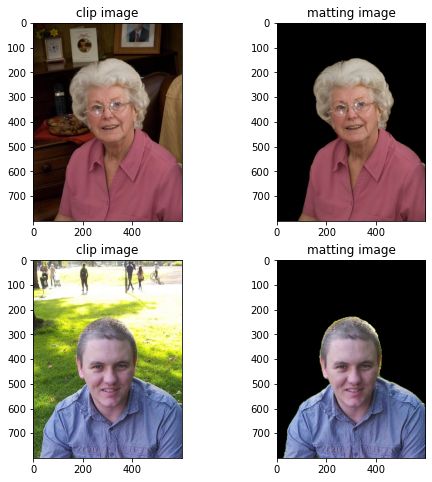

In [10]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2,figsize=(8,8))

for i in range(2):
    axs[i][0].set_title('clip image')
    axs[i][0].imshow(clip[i])
    axs[i][1].set_title('matting image')
    axs[i][1].imshow(mat[i])

In [11]:
x,y=data.clip_paths,data.matted_paths

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30983,)
(30983,)
(3443,)
(3443,)


In [13]:
def read_image(path):
    img=cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(256,256))
    return img

In [14]:
def convert_colors_to_classes(img):
    mask=np.zeros((256,256))
    img=np.sum(img,2)
    ind1=np.where(img<=3)
    
    mask[ind1[0],ind1[1]]=1
    return mask
    

In [15]:
import random
def train_generator(clip_path,matted_path, batch_size=16):
    while True:
        files=random.sample(list(zip(clip_path,matted_path)),10000)
        for i in range(0, 10000, len(clip_path)//batch_size):
            batch_files=files[i:i+batch_size]
            
            x=np.zeros((batch_size,256,256,3))
            y=np.zeros((batch_size,256,256))
            imgs=[]
            segs=[]
            for j in range(batch_size):
                image = read_image(batch_files[j][0])
                x[j]=image
            
                mask = read_image(batch_files[j][1])
                
                y[j]=convert_colors_to_classes(mask)

            yield x,y

In [16]:
def test_generator(clip_path,matted_path, batch_size=16):
    while True:
        for i in range(0, len(clip_path)-batch_size, len(clip_path)//batch_size):
            batch_img_files=clip_path[i:i+batch_size]
            batch_mask_files=matted_path[i:i+batch_size]
            x=np.zeros((batch_size,256,256,3))
            y=np.zeros((batch_size,256,256))
            imgs=[]
            segs=[]
            for j in range(batch_size):
                image = read_image(batch_img_files[j])
                x[j]=image
            
                mask = read_image(batch_mask_files[j])
                
                y[j]=convert_colors_to_classes(mask)

            yield x,y

In [17]:
train_gen=train_generator(list(x_train.values),list(y_train.values))
valid_gen=test_generator(list(x_test.values),list(y_test.values))

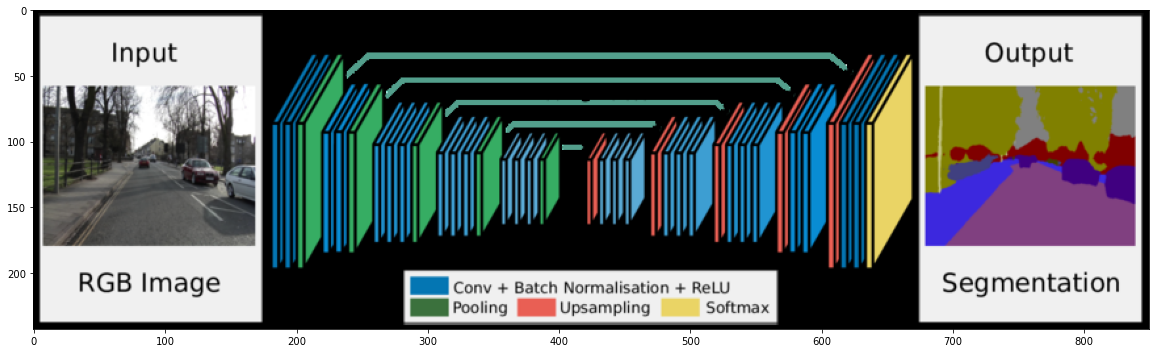

In [99]:
def load_model_img(path):
    img=cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
image=load_model_img('../input/segnet1/segnet.png')
fig, axs = plt.subplots(figsize=(20,40))
axs.imshow(image)
plt.show()

In [19]:
def segnet():
    
    input1=Input((256,256,3))
    conv1=Conv2D(64,3,activation='relu',padding='same',kernel_initializer='he_normal')(input1)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(64,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    c1=BatchNormalization()(conv2)
    drop1 = Dropout(0.1)(c1)
    pool1 =MaxPooling2D(pool_size=(2, 2))(drop1)
    
    conv1=Conv2D(128,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool1)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(128,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    c2=BatchNormalization()(conv2)
    drop2 = Dropout(0.1)(c2)
    pool2 =MaxPooling2D(pool_size=(2, 2))(drop2) 
    
    conv1=Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool2)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    batch2=BatchNormalization()(conv2)
    conv3=Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch2)
    c3=BatchNormalization()(conv3)
    drop3 = Dropout(0.1)(c3)
    pool3 =MaxPooling2D(pool_size=(2, 2))(drop3) 
    
    conv1=Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool3)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    batch2=BatchNormalization()(conv2)
    conv3=Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch2)
    c4=BatchNormalization()(conv3)
    drop4 = Dropout(0.1)(c4)
    pool4 =MaxPooling2D(pool_size=(2, 2))(drop4) 
    
    conv1=Conv2D(1024,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool4)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(1024,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    batch2=BatchNormalization()(conv2)
    conv3=Conv2D(1024,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch2)
    c5=BatchNormalization()(conv3)
    drop5 = Dropout(0.1)(c5)
    pool5 =MaxPooling2D(pool_size=(2, 2))(drop5) 
    

    
    up1 =Conv2D(1024,2, activation = 'relu', padding = 'same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(pool5))
    merge1 = concatenate([c5,up1], axis =3)
    
    conv1=Conv2D(1024,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge1)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(1024,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    batch2=BatchNormalization()(conv2)
    conv3=Conv2D(1024,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch2)
    batch3=BatchNormalization()(conv3)
    batch3 = Dropout(0.2)(batch3)
    
    
    up2 =Conv2D(512,2, activation = 'relu', padding = 'same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(batch3))
    merge2 = concatenate([c4,up2], axis =3)
    
    conv1=Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge2)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    batch2=BatchNormalization()(conv2)
    conv3=Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch2)
    batch3=BatchNormalization()(conv3)
    batch3 = Dropout(0.2)(batch3)
    

    up3 =Conv2D(256,2, activation = 'relu', padding = 'same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(batch3))
    merge3 = concatenate([c3,up3], axis =3)

    conv1=Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge3)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    batch2=BatchNormalization()(conv2)
    conv3=Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch2)
    batch3=BatchNormalization()(conv3)
    batch3 = Dropout(0.2)(batch3)
    

    up4 =Conv2D(128,2, activation = 'relu', padding = 'same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(batch3))
    merge4 = concatenate([c2,up4], axis =3) 

    conv1=Conv2D(128,2,activation='relu',padding='same',kernel_initializer='he_normal')(merge4)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(128,2,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    batch2=BatchNormalization()(conv2)
    batch2 = Dropout(0.2)(batch2)
    
    
    up5 =Conv2D(64,1, activation = 'relu', padding = 'same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(batch2))
    merge5 = concatenate([c1,up5], axis =3) 

    conv1=Conv2D(64,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge5)
    batch1=BatchNormalization()(conv1)
    conv2=Conv2D(64,3,activation='relu',padding='same',kernel_initializer='he_normal')(batch1)
    batch2=BatchNormalization()(conv2)
    
    
    output=Conv2D(1,(1,1),activation='sigmoid')(batch2)
    
    model=Model(input1,output)
    model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy",tf.keras.metrics.MeanIoU(num_classes=2)])
    return model

In [20]:
segnet_model=segnet()

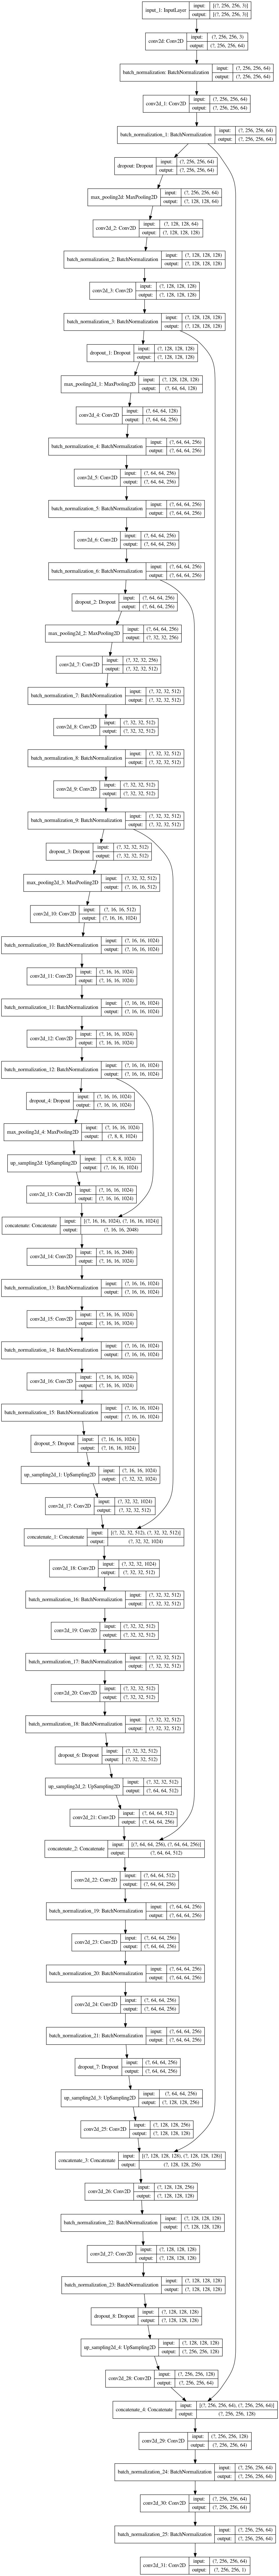

In [21]:
keras.utils.plot_model(segnet_model,to_file="model.png",
    show_shapes=True)

In [22]:
history=segnet_model.fit_generator(train_gen,steps_per_epoch=10000 // 16,
        epochs=10,
        validation_data=valid_gen,
        validation_steps=x_test.shape[0]//16)

Epoch 1/10
625/625 [==============================] - 536s 857ms/step - loss: 0.1972 - accuracy: 0.9244 - mean_io_u: 0.2781 - val_loss: 0.1079 - val_accuracy: 0.9623 - val_mean_io_u: 0.2786
Epoch 2/10
625/625 [==============================] - 528s 845ms/step - loss: 0.1110 - accuracy: 0.9630 - mean_io_u: 0.2851 - val_loss: 0.0851 - val_accuracy: 0.9720 - val_mean_io_u: 0.2830
Epoch 3/10
625/625 [==============================] - 528s 845ms/step - loss: 0.0953 - accuracy: 0.9692 - mean_io_u: 0.2915 - val_loss: 0.0955 - val_accuracy: 0.9743 - val_mean_io_u: 0.2786
Epoch 4/10
625/625 [==============================] - 528s 844ms/step - loss: 0.0827 - accuracy: 0.9739 - mean_io_u: 0.2927 - val_loss: 0.0662 - val_accuracy: 0.9790 - val_mean_io_u: 0.3101
Epoch 5/10
625/625 [==============================] - 527s 843ms/step - loss: 0.0739 - accuracy: 0.9764 - mean_io_u: 0.2947 - val_loss: 0.0693 - val_accuracy: 0.9787 - val_mean_io_u: 0.3590
Epoch 6/10
625/625 [==============================

In [24]:
segnet_model.save('best_model.h5')

In [96]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'mean_io_u', 'val_loss', 'val_accuracy', 'val_mean_io_u'])


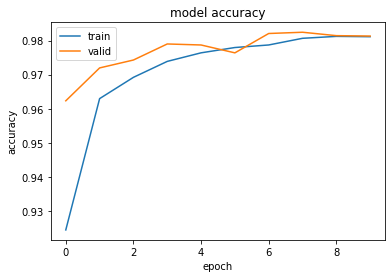

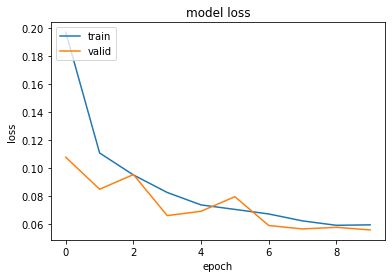

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [47]:
print('select three images for prediction between 0 and '+str(len(x_test)))
img=[]
actual=[]
for i in range(3):
    k=input('select image number from test list:')
    im=read_image(list(x_test)[int(k)])
    img.append(im)
    actual.append(read_image(list(y_test)[int(k)]))

select three images for prediction between 0 and 3443
select image number from test list:46
select image number from test list:56
select image number from test list:76


In [65]:
pred=[]
for i in range(3):
    p=segnet_model([img[i].reshape(1,256,256,3)])
    p=p<0.5
    p=np.array(p).astype(int)
    p=p.reshape(256,256)
    ind=np.where(p==0)

    m=img[i].copy()
    m[ind[0],ind[1],:]=[0,0,0]
    pred.append(m)

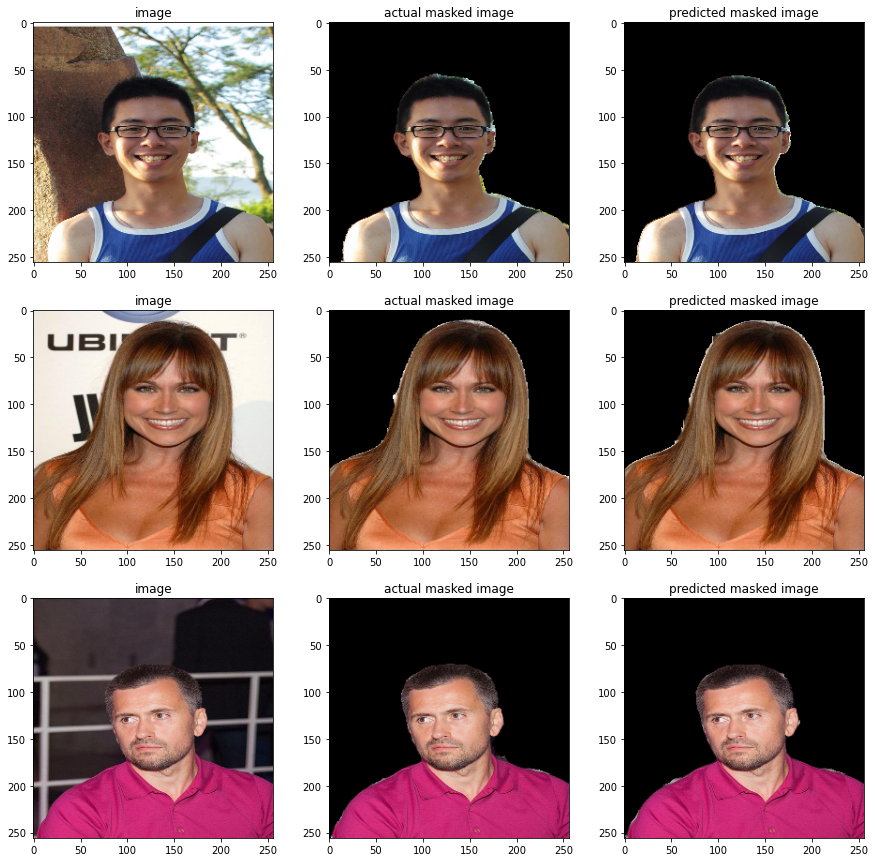

In [66]:
fig, axs = plt.subplots(3, 3,figsize=(15,15))

for i in range(3):
    axs[i][0].set_title('image')
    axs[i][0].imshow(img[i])
    axs[i][1].set_title('actual masked image')
    axs[i][1].imshow(actual[i])
    axs[i][2].set_title('predicted masked image')
    axs[i][2].imshow(pred[i])
plt.show()

In [94]:
def prediction(path):
    img=read_image(path)
    img=img.reshape(1,256,256,3)
    pred=segnet_model.predict([img])
    pred=pred.reshape(256,256)
    pre=pred<0.5
    pre=pre.astype(int)
    ind=np.where(pre==0)
    img=img.reshape((256,256,3))
    m=img.copy()
    m[ind[0],ind[1],:]=0
    return img,m
paths=['../input/backg4/modi.jpg','../input/backg3/ntr.jpg','../input/backg2/nani1.jpeg']

predict=[]
images=[]

for i in range(3):
    a,b=prediction(paths[i])
    images.append(a)
    predict.append(b)
    

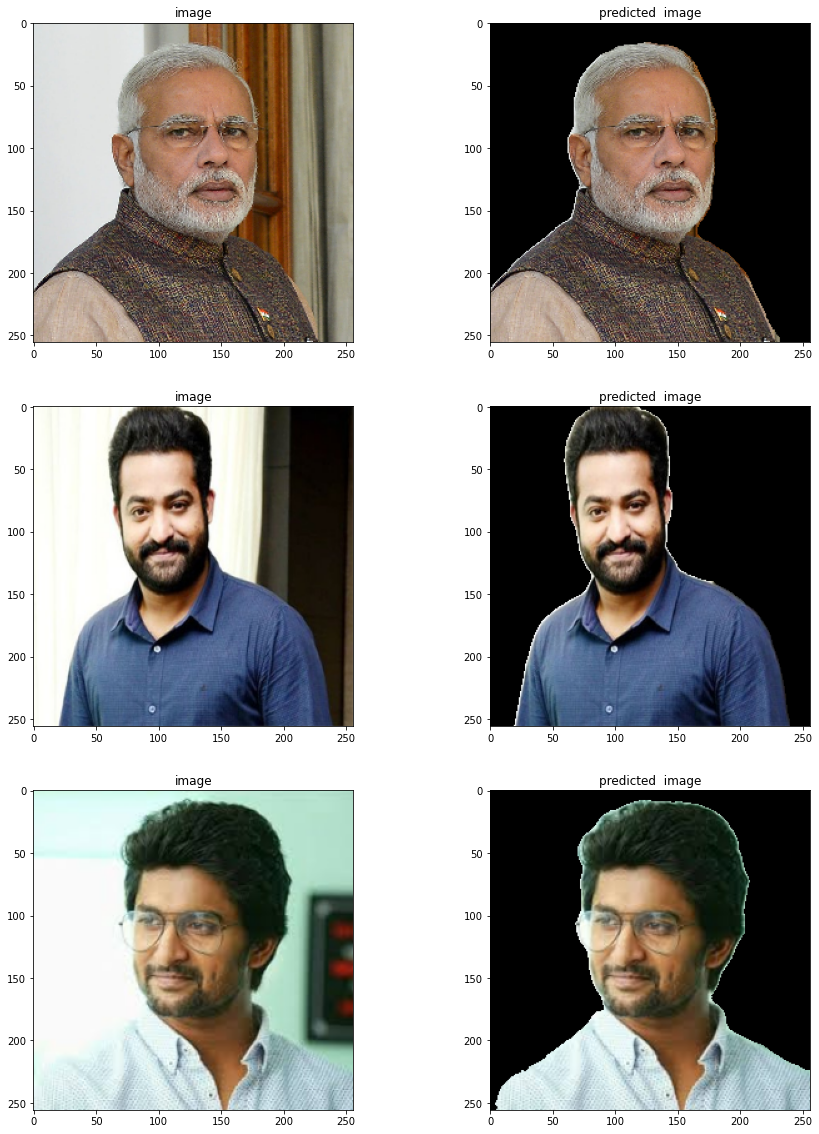

In [95]:

fig, axs = plt.subplots(3, 2,figsize=(15,20))

for i in range(3):
    axs[i][0].set_title('image')
    axs[i][0].imshow(images[i])
    
    axs[i][1].set_title('predicted  image')
    axs[i][1].imshow(predict[i])
plt.show()